# CSCD25 Project Part 1
This is a research project from CSCD25 (Advanced Data Analysis) supervised by Professor Anderson and TA Waller.

https://tonyli1121.github.io/Reddit-Analysis/

**This file contains:**

```
- processing main datasets
- analysis on research question 1 and 2
- plotting on all generated results
```


## Abstract

The Six degrees of seperation (also known as six handshakes rule) is an idea that all people are six or fewer social connections away from each other. As a result, a chain of "friend of a friend" statement can be made to connect any two people in a maximum of six steps. 

Several studies, such as Milgram's small-world experiment, have been conducted to measure this connectedness empirically, and nowadays the phrase "six degrees of separation" is now often used as a synonym for the idea of the "small world" phenomenon.

    Some ground-breaking phenomenons discovered by researchers are 
	1) There are 19 degrees of separation between any two web pages (by Hungarian physicist Albert-László Barabási in 2013). 
	
	2) shortest path from one Wikipedia to another is 3 degrees, while the furthest is just 11 degrees. 
	
	3) Facebook's data team released two papers in November 2011 which document that amongst all Facebook users at the time of
	research (721 million users with 69 billion friendship links) 
	There is an average distance of 4.74. And by February 2016, the distance is 4.57 on avg on 1.6 billion users 
	(about 22% of the world population)
	
	4) On average, about 50% of people on Twitter are only four steps away from each other.
	...

	It turns out that for social networking websites with large amount of users, the six handshakes rule stays valid. 
	
Reddit, known as one of the most famous social news and discussion website, also has a huge amount of users. According to an analysis on reddit's monthly visitors, as of June 2021, Reddit had almost 48 million monthly active users.	(https://www.statista.com/statistics/443332/reddit-monthly-visitors/) 

Based on how Reddit works

	Registered members submit posts to the site such as links, text posts, images, and videos, which are then 
    voted up or down and commented by other members
	
I am particularly interested in the existence of the Six Degrees of Separation on Reddit and several research questions related to it.


---

## Research Question:

The goal of this research is to find if given two authors, if there exist a path to get to one from another by tracking user activities in small # of steps.
	
A brief example would be as followed:
```

       user 1 asked "A" 
             /\
            /  \
    answered by user2,user3
	     /         \
	    /           \
commented by user4   user5, user 6
          /	          \       \
         /	    	    \       \
    asked "C"       answered "C"   asked "B"

Then we say there is a path from 
	user3 -> user1 (user3 commented user1's post "A")
	user1 -> user5 (user5 commented a comment under user1's post)
Hence, user3 is connected with user5 with a path length of 2
```
Here are a list of research questions:
    
1. Does there exist a "friend of friend" chain in reddit users (i.e., connected by commenting)? If so what is the chance of existence?

2. Among all the paths, what is the average path length? Is it small (easy to get from one user to another)?
    
3. Can we form any relation between clusters and length of path?
    (i.e., repeat the previous two problems, but only under same subreddit)
    
4. How do the "active" users affect the length of path?

---

## Hypothesis:
	
1. There is a "Small world"/"Six Handshake Rule" relationshipt between users (all connected)
2. The average path length is ~6 
3. Yes, smaller cluster has smaller path length
	3.1 There also exists path between users under subreddits
	3.2 The path length under subreddits is slightly smaller than the general path length (i.e., ~4 or ~5)
4. The "active" users are not crucial in constructing path, but they are the key factor to keep path length small.
	
Verify the hypothesis/research goals by
	
1 & 2. Check with main dataset
    (a) avg distance for existing path
    (b) possibility for path to exist given any two posts (success/total)

3. Check with full dataset with certain subreddit
   (a) possibility for path to exist given any two posts (success/total)
   (b) avg distance for existing path
    
4. Compare result after removing top k% most active users.

---

# Answer to research questions

`Q1:` We see that the `chance for a path to exist` `increases` as we have `more nodes` in the graph. However, it is not sufficient to conclude that the network is connected as a large component as we don't have data supporting us. (we stopped at 60% of main_dataset as otherwise memory error). Hence the `conclusion` is that: **The 'user chain' in main_dataset is very likely to exist only if we filter out the isolated nodes**

`Q2:` We only see that as `number of nodes increases`, the `avg path length increases`, but does not have an absolute idea on what the overall path length will be as the value is still increasing (it is likely that the value will be capped at some threshold). Hence, the `conclusion` is that: **we have small path length among the existed paths, but we still need to verify with more detailed dataset.** 

The `assumption` is that the `path length` will remain increasing but `capped at certain value`, which will require us to check in the `full dataset analysis` that uses the smallest subreddit for comprehensive understanding, and also using the entire full dataset for detailed analysis.

`Q3:` Under subreddit PS5, the users are `strongly connected` (>99% chance for path to exist between arbitrary users). Different from our hypothesis (pathlen ~= 4, 5) the `average path length is ~3.0`. **Hence users are strongly connected with small path length under subreddits**

`Q4:` According to the first bar chart, we see that as we `remove more active users`, the % of existence `decreases`. This means that the `active users` are `important in constructing network`. **The more activer users we exclude, the less likely a path will exist.** Pie plotting on the full analysis after filtering the top1% further supported this. As the `% Existence` decreased from `99% to 55%`. Hence, **the active users indeed act as an important role in connecting users together**. 

# Insights from the datastory

### 1. The `small world` exists in any society with large user base and some kind of connection between users
As what we expected, there is a `large component` that contains all authors. In other words, the `community of Reddit` is a `small world` such that everyone can reach others in small number of steps.

According to the theoratical findings in [Six Degrees of Separation in Online Society](https://www.researchgate.net/publication/255614427_Six_Degrees_of_Separation_in_Online_Society) that had been supported by multiple mathematic models and measurements, accompanied with the large user base of reddit ([user stats of reddit](https://www.statista.com/statistics/443332/reddit-monthly-visitors/)). We could conclude that the `small world` does `not only` exist in the world-famous online societies like Reddit/Facebook/..., `but also` is presented in any society that has a large amount of user base and some sort of connection that connects everyone (in Reddit: 'comment', in Twitter: 'follow', in Facebook: 'friends',...)

### 2. The role of active users is `not` connecting individual users, `but` instead connecting components

Initially we thought that by removing the active users, we will have the connection broken and path length decreased. However, after the analysis, we see that only the `connection` is affected by the active users. The idea behind is that although the `single large component` structure is broken, every new (sub)components are still large enough that follows the trend of average path length. The `Six degree of seperation` theory still holds under each component except that we can't reach nodes from one component from other components.
```
(component_A) <--> active user <--> (component_B) 
>>> every nodes in the graph is connected, form a large component

>>> By removing activer users, we get 
(component_A) | (component_B)
>>> The nodes under each component are still connected, hence pathlength remains almost same.
>>> However, since we can't reach component_B from component_A, the % Existence decreases.
```

According to the idea above, the active users is in fact `not` acting as connection `between individual users`, but instead a `bridge` `between the components` (groups of users).

**We argue that the `active users are mostly from submissions authors`**

Think about changing the graph into a `directed` graph, that is (a -> b if a commented b). Then by our previous definition on active users, the `active users` are expected to come `from the submission authors` more than the comments authors. Why? Because we defined the active users by their degree, and the submission authors can receive hundreds of comments from one single post (`i.e., submissions authors deg += >100 for one action`) while the comment authors can only raise their degree by `1 for one action`. Hence, the active users will be mostly from the submissions authors.

**Now we see why only `% Existence` changed**

Consider the `active users as the submission authors`, if we remove them from the graph, the `component` structure is broken as for each submission authors, there are a lot of comment authors connected with it. Like the `root` of a tree, although there are still sub-trees, the large tree structure is broken.

Recall how we visualized a path in the `research question`? When we remove the active user, we are removing the root, leaving a lot of subtrees connected internally but disconnected from each other. 

`Therefore`, as we remove the active user, we are removing the root, leaving a lot of subtrees connected internally but disconnected from each other. This is `why the path length did not change much`, we are `just changing level of tree by 1` when we remove the root. However, the `% Existence` changed by a lot because every `subtree is disconnected with each other` now.

## References 

[Wikipedia](https://en.wikipedia.org/wiki/Six_degrees_of_separation)

[floyd vs dijkstra](https://www.geeksforgeeks.org/comparison-dijkstras-floyd-warshall-algorithms/)

[snap.py](https://snap.stanford.edu/snappy/)

[convert pandas to snap](https://stackoverflow.com/questions/51780621/converting-pandas-dataframe-to-snap-py)

[networkx 1](https://stackoverflow.com/questions/14011600/sorting-a-networkx-graph-object-python), [networkx 2](https://stackoverflow.com/questions/50884035/networkx-calculating-and-storing-shortest-paths-on-a-graph-to-a-pandas-data-fra)

[Generalists and Specialists: Using Community Embeddings to Quantify Activity Diversity in Online Platforms by Isaac Waller and Ashton Anderson](http://csslab.cs.toronto.edu/gs/actdiv-www2019.pdf)

[Zhang, Lei & Tu, Wanqing. (2009). Six Degrees of Separation in Online Society. ](https://www.researchgate.net/publication/255614427_Six_Degrees_of_Separation_in_Online_Society)

---

# Import and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
# import plotly as px

In [2]:
comments = pd.read_csv("main_comments.csv.gz")
comments = comments[comments.author!='Io99IHkg-4QzX6xbKwbte0cuzp4=']
comments = comments[comments.author!='EA1r-K5p_lVBLesLhCFRrKOPN-I=']

In [3]:
submissions = pd.read_csv("main_submissions.csv.gz")
submissions = submissions[submissions.author!='Io99IHkg-4QzX6xbKwbte0cuzp4=']
submissions = submissions[submissions.author!='EA1r-K5p_lVBLesLhCFRrKOPN-I=']

# Understanding the data
print the size, unique values, isna(), etc. to have an eye on the data

In [4]:
print('====== COMMENTS DF =====')

print("shape is: ")
print(comments.shape)
print("columns are: ")
print(comments.columns.tolist())
print("is there any null values?")
display(comments.isna().any())

comments.head()

====== COMMENTS DF =====
shape is: 
(24350199, 6)
columns are: 
['id', 'score', 'link_id', 'author', 'subreddit', 'created_utc']
is there any null values?


id             False
score          False
link_id        False
author         False
subreddit      False
created_utc    False
dtype: bool

,id,score,link_id,author,subreddit,created_utc
1,t1_gmd0xrl,1,t3_lehibh,1UBdU9GQvCnnXQHAcYaG1uL9V_U=,RedditSessions,1612683157
4,t1_fn060jg,26,t3_fyheuv,_aeNuqWD_AT5JIfooWYpKiZR8qg=,nfl,1586536065
5,t1_gdhhjoh,8,t3_k0dzys,-4m5WOf2aRCaVgj2G2xQlhd_ZWc=,soccer,1606252691
6,t1_ff0oda3,3,t3_er1075,JoEJzH4WITDq1N5zUMFRtrVI6mk=,nfl,1579470758
7,t1_gbprexo,5,t3_jq25ke,1iOmD2WgmAGg6ZxWvOE-oDzhwMo=,ukpolitics,1604927620


In [5]:
print("mean of score is: "+str(comments.score.mean()))
print("median of score is: "+str(comments.score.median()))
print("# of types of subreddit: " + str(comments.subreddit.nunique()))

mean of score is: 11.78006064755364
median of score is: 2.0
# of types of subreddit: 92


In [6]:
print('====== SUBMISSION DF =====')

print("shape is: ")
print(submissions.shape)
print("columns are: ")
print(submissions.columns.tolist())
print("is there any null values?")
display(submissions.isna().any())

submissions.head()

====== SUBMISSION DF =====
shape is: 
(1659560, 7)
columns are: 
['id', 'author', 'created_utc', 'domain', 'is_self', 'score', 'subreddit']
is there any null values?


id             False
author         False
created_utc    False
domain          True
is_self        False
score          False
subreddit      False
dtype: bool

,id,author,created_utc,domain,is_self,score,subreddit
0,t3_kby7v8,ZkakZ8xfXNiL6wUXhJhRU3Ysa7c=,1607811261,self.AskReddit,True,3,AskReddit
1,t3_nwccst,pQ8j9hcuty1RBfCkUutL0cy9Zco=,1623290593,i.redd.it,False,11,pics
2,t3_ik55fe,GH3YzjQCtBT4DkTjcxWb2-vPoa0=,1598903369,self.Market76,True,0,Market76
3,t3_hkl0qs,57zAuZ7GS2EvQeCSXqU19wYZgjs=,1593790032,v.redd.it,False,1,funny
4,t3_jdrjpp,HY8UtHbd9PNUDFmaAkm4-10hgmA=,1603066751,i.redd.it,False,578,PrequelMemes


In [7]:
# look at null values for domain
display(submissions[submissions['domain'].isna()].head())
print("Amount of NaN: "+ str(submissions[submissions['domain'].isna()].shape[0]))
print("Max score of NaN: " + str(submissions[submissions['domain'].isna()].score.max()))
print("Mean score of NaN: " + str(submissions[submissions['domain'].isna()].score.mean()))
print("Median score of NaN: " + str(submissions[submissions['domain'].isna()].score.median()))
print("Number of subreddits that has NaN: " + str(submissions[submissions['domain'].isna()].subreddit.nunique()))

print("drop the NaN values b/c amount is small, and low mean/median -> little influence")
submissions.dropna(inplace=True)


,id,author,created_utc,domain,is_self,score,subreddit
1155142,t3_btrijg,nt8JT0NsJ1PAI84HsbdybrrZP8A=,1558991890,NaN,False,0,classicwow
1155388,t3_btc71n,vskL7TEkWuwuzG5OfoWNF7TrV08=,1558899632,NaN,False,1,AskReddit
1155493,t3_btl2q1,pDwrr-reuo99xObYlwlwFz5GhQU=,1558957650,NaN,False,3,AskReddit
1158903,t3_btz7b0,0ayu-uLpew8bux5t4fnvkph-_BA=,1559044987,NaN,False,1,DestinyTheGame
1158966,t3_btemyp,N5vvo1pfp-R_uemACwz-MUrhYow=,1558912506,NaN,False,3,AskOuija


Amount of NaN: 309
Max score of NaN: 242
Mean score of NaN: 4.26537216828479
Median score of NaN: 1.0
Number of subreddits that has NaN: 40
drop the NaN values b/c amount is small, and low mean/median -> little influence


In [8]:
print("mean of score is: "+str(submissions.score.mean()))
print("median of score is: "+str(submissions.score.median()))
print("# of types of subreddit: " + str(submissions.subreddit.nunique()))

mean of score is: 243.7405202708933
median of score is: 2.0
# of types of subreddit: 92


In [9]:
link_ids = comments.link_id.unique().tolist()
submission_ids = submissions.id.unique().tolist()

print("verify that link_ids is a subset of submission_ids")
all(x in submission_ids for x in link_ids)

verify that link_ids is a subset of submission_ids


False

In [10]:
print("verify that submission_ids is a subset of link_ids")
all(x in link_ids for x in submission_ids)

verify that submission_ids is a subset of link_ids


False

In [11]:
print("verify that for comments, link_id can also be id of a comment (not just id of submission)")
# any(x in comments.id.unique().tolist() for x in link_ids)
print(False) # to save running time (already checked)

verify that for comments, link_id can also be id of a comment (not just id of submission)
False


In [12]:
print("verify that ids are unique for each submission / comments: ")
#print(submissions.id.nunique() == submissions.shape[0])
#print(comments.id.nunique() == comments.shape[0])
print(True)
print(True)

verify that ids are unique for each submission / comments: 
True
True


#### we see that for comments data:

    - 28M rows, 6 columns
    - no null values
    - mean of score is much higher than median <- potential of outliers on popularity -> careful on prediction

#### we see that for submissionss data:

    - 1.8M rows, 7 columns
    - "domain" has null values
        - 456 submissions have NaN domain
        - the mean and median score are both low
        - not all subreddits submissions have NaN domain
        - since number is very low comparing to the amount of samples we have => DROP them
    - mean of score is much higher than median <- potential of outliers on popularity -> careful on prediction

#### conclusion on oberserving data
    - for the user/post connection, since link_id in comments is not necessarily a subset of submission_id,
      we need to explicitly choose the data to form our matrix
    - for prediction model, be careful about outliers in score
    - we dropped the NaN values (only 454 of them, mean/median close to 0 -> little influence)

# User connection

This section will analyze whether there is a "path" between users by checking "commenting"

The comments and submissions data will be sufficient to build a matrix representing a graph structure.

I will take a sample data of 100k from submissions to speed up the process, and by the end use same algorithm to analyze on the full 1.8M data.

#### graph construction algorithm

if a commented b / vice-versa, then a is connected to b

Generally, we check the id <-> link_id connection and build edges between authors.

We can use the "authors" to represent each vertex, and author_i is connected to author_j iff author_i commented author_j (see graph construction pdf for more, HAVEN'T UPLOADED YET, just some scratch draft for now)

For underiected graph G = (V, E), 
    
    - V = authors
    - O(|V|) = O(|authors_of_submissions|) + O(|authors_of_comments|)
    - E = (a_i, a_j), a_i's submission is commented by a_j or reverse
    - O(|E|) = |comments|
    - O(|G|) = |V|^2 (NxN matrix representation)
    
#### Find expected size of matrix by looking at author info
Instead of only taking authors who commented with link_id = submission_id, we chose to use all authors.
Because notice that comment_linkID is not a subset of submissions, meaning that there could be path without using any vertex from submissions.
(see wrong approach below for details)

In [13]:
# take subsample of 100k, use seed = birthday for luck :)

submissions_authors = submissions.sample(100000, random_state=1121)[['id','author']]
#submissions_authors = submissions[['id','author']]

# WRONG approach: comments_authors = comments[comments.link_id.isin(submissions_authors.id)][['link_id','author']]
comments_authors = comments.sample(100000, random_state=1121)[['id','link_id','author']]
#comments_authors = comments[['id','link_id','author']]

# list of all unique authors in comments + submissions
authors = set(submissions_authors.author.unique().tolist() + comments_authors.author.unique().tolist())
authors = list(authors)

print("number of submissions: " + str(submissions_authors.shape[0]))
print("number of submission authors: " + str(submissions_authors.author.nunique()))

print("number of comments: " + str(comments_authors.shape[0]))
print("number of comment authors: " + str(comments_authors.author.nunique()))

print("number of authors that in submissions only: ")
print(submissions_authors[~submissions_authors.author.isin(comments_authors.author)].author.nunique())
print("number of authors that in comments only: ")
print(comments_authors[~comments_authors.author.isin(submissions_authors.author)].author.nunique())


number of submissions: 100000
number of submission authors: 70736
number of comments: 100000
number of comment authors: 92095
number of authors that in submissions only: 
69547
number of authors that in comments only: 
90906


#### construct graph using above data

In [14]:
# construct matrix

# df that maps id to corresponding author
id_author = submissions[['id','author']].append(comments[['id','author']])
id_author.columns=['link_id','link_author']

In [15]:
out = comments_authors.merge(id_author, left_on='link_id', right_on='link_id')
display(out.head()) # we get a df that has id-author, link_id-link_author mapping
print(out.shape[0]) # around 540k/28M = 2% of data has link_author; 1815/100k = 2% of data has link_author

link_df = out.groupby('link_author')['author'].apply(list).reset_index()
display(link_df.head()) # we see link-author <-> [list of authors]

,id,link_id,author,link_author
0,t1_gw3i1qk,t3_mzwnem,xf49T_eHch6P-JVMAxeuqh6tutI=,d1nJlnvhlSXAgzifpiSUboDZOuQ=
1,t1_fy1j6t9,t3_hqlf85,31hMY0Xd5-UFGorI6na7igVyNQE=,9tH33QdJxwKi2qmwYsbGaaEY18s=
2,t1_elkjhnx,t3_bgddn1,xO9DbldidLE0OM1FjEiFUoTQV_U=,SEUekVwS6TYr1APJu2eIosVOQdk=
3,t1_ell0qyp,t3_bgddn1,oXaMMVALx8VALcDb3j7IzwQy78o=,SEUekVwS6TYr1APJu2eIosVOQdk=
4,t1_ellngxe,t3_bgddn1,FZRJtR3QIBKJ36DIfNwfHLmT4cg=,SEUekVwS6TYr1APJu2eIosVOQdk=


1815


,link_author,author
0,-0Rh_RMIdihFzKdfZ6IY_ImaD3A=,[OboRpGS968U05IJrrb8zVVVqjZI=]
1,-10E0Eq0l7ZoOdtLdUUYs10KpUs=,[D-EMSv1S4dGSDIO3ptbvQtOWVxw=]
2,-1LcRMy61zCjkaeZl3gABIfDCiI=,[s-OdXPo7beKRqd37eBzPACrIwo8=]
3,-2W3c6_0J9ehVkl0Wp5tf8Wc_yQ=,[fQN640imN6KziN-gbjXC1hgpBDU=]
4,-Bs3KvBWrM8xJPlmCY7CgS80BPY=,[F9UADV0ZqJo3aSDZXX9wmeeUpzo=]


In [16]:
link_df = link_df.explode('author')
display(link_df.head())
# link author <-> author1, author2, ...

,link_author,author
0,-0Rh_RMIdihFzKdfZ6IY_ImaD3A=,OboRpGS968U05IJrrb8zVVVqjZI=
1,-10E0Eq0l7ZoOdtLdUUYs10KpUs=,D-EMSv1S4dGSDIO3ptbvQtOWVxw=
2,-1LcRMy61zCjkaeZl3gABIfDCiI=,s-OdXPo7beKRqd37eBzPACrIwo8=
3,-2W3c6_0J9ehVkl0Wp5tf8Wc_yQ=,fQN640imN6KziN-gbjXC1hgpBDU=
4,-Bs3KvBWrM8xJPlmCY7CgS80BPY=,F9UADV0ZqJo3aSDZXX9wmeeUpzo=


recursively find root_id of a comment, we need this to expand the graph matrix for more data, the link_df only has direct comments to post and comments to comments. If the link_id has no author recorded -> we lose that information, but it is possible for the root_id to have author recorded. We will have a more comprehensive dataset if we use both root_id and link_id to find authors

Below is an attempt to find root id

In [17]:
'''from tqdm import trange

root_id_dict = {}

ids = comments_authors.id.tolist()
link_ids = comments_authors.link_id.tolist()
parent_of_id =  dict(zip(comments_authors.id, comments_authors.link_id))
len_id = len(ids)

# recursively find root id, use lists and dictionary rather than df to speed up tracking process
# only need list[i], dict[i] instead of df.loc[df.column==i]
for i in trange(len_id):
    current_id = ids[i]
    current_link_id = link_ids[i]
    root_id = 0
    while root_id != current_link_id:
        if current_link_id not in ids:
            # no parent
            root_id = current_link_id
        else:
            # has parent, current = link of current
            current_link_id = parent_of_id[current_link_id]
    if (link_ids[i] != root_id):
        print("current_id: " + str(current_id) + ", root_id: " + str(root_id))
    
    root_id_dict[current_id] = root_id

# working on 100k data takes 15 mins (using list + dict), 18 mins(using df)
# working on all data takes estimated ~2200 mins (using list + dict), estimated 2400 mins(=40hrs using df)

comments_authors['root_id'] = comments_authors['id'].map(root_id_dict)
print("rows where root_id != link_id: ") 
np.where(comments_authors.root_id != comments_authors.link_id)
# commented all to save running notebook time'''
print('\n')

Notice that finding root id will take way too much time(30~40hrs) without really providing useful information (no root id in fact). We will not use it

- use all authors that appeared in rows/columns of above matrix as indices
- if matrix[i,j]=1 or matrix[j,i]=1, then graph[i,j] = graph[j,i] = 1


    for i in df.A:
        connected = df.B 
        graph[i,connected] = graph[connected,i] = 1

In [18]:
from tqdm import trange

authors_list = link_df.link_author.unique().tolist() + link_df.author.unique().tolist()
authors_list = list(set(authors_list)) # take unique values only
print("length of authors_list is: " + str(len(authors_list)))

# construct graph matrix 

author_matrix = pd.DataFrame(index = authors_list, columns= authors_list)

len_link_df = link_df.shape[0]
    
# create df[i,j] = df[j,i] = 1 if i commented j or j commented i    
for i in trange(len_link_df):
    current_link_author = link_df.iloc[[i]].link_author.item()
    current_author = link_df.iloc[[i]].author.item()
    if (current_link_author != current_author):
        author_matrix.at[current_link_author, current_author] = 1
        author_matrix.at[current_author, current_link_author] = 1
    
# fill rest with 0 -> no edge
author_matrix = author_matrix.fillna(0)

# display some information on the matrix 
display(author_matrix.shape)

(unique, counts) = np.unique(author_matrix.sum(), return_counts=True)
frequencies = np.asarray((unique, counts)).T
print("# of connected authors | count")
display(frequencies)
#author_matrix.to_csv('sample_author_matrix.csv')

length of authors_list is: 3232


100%|█████████████████████████████████████| 1815/1815 [00:00<00:00, 2413.76it/s]


(3232, 3232)

# of connected authors | count


array([[   0,   47],
       [   1, 3095],
       [   2,   49],
       [   3,   26],
       [   4,    7],
       [   5,    1],
       [   6,    2],
       [  10,    1],
       [  12,    2],
       [  25,    1],
       [ 155,    1]])

Draw the largest component of 100k data

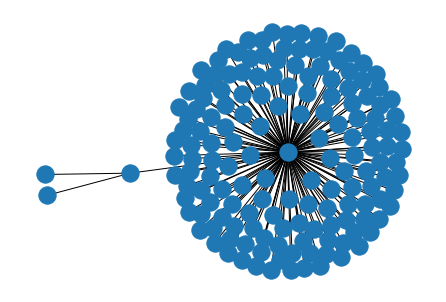

In [23]:
import networkx as nx
from matplotlib.pyplot import figure

author_matrix = pd.read_csv('sample_author_matrix.csv',index_col=0)

G = nx.from_pandas_adjacency(author_matrix)

components = sorted(nx.connected_components(G), key=len, reverse=True)
largest_component = components[0]

nx.draw_spring(G.subgraph(largest_component))

The graph has each vertex = author, no self connected edge (i.e., G[i,i] = 0)
It is constructed from an adjancency matrix as above, by looking at the freq, we see that most users have only 1 comment. Hence so far (using 50k~100k sample data), my hypothesis is that the information flow is slow (long path)

#### Dijkstra on Authors



In [20]:
for i in tqdm.tqdm(author_matrix.index):
    for j in author_matrix.columns:
        try:
            path = nx.shortest_path(G, source = i, target = j)
            path_len = nx.shortest_path_length(G, source=i, target=j)
        except nx.NetworkXNoPath:
            path = None
            path_len = None
            
        #author_path.at[i,j] = path
        author_matrix.at[i,j] = path_len

# author_matrix.to_csv("sample_author_floyd.csv")


100%|███████████████████████████████████████| 3232/3232 [03:01<00:00, 17.83it/s]


In [17]:
author_matrix = pd.read_csv("sample_author_floyd.csv", index_col = 0)

In [18]:
# possibility of having path (exclude rows that have only one value)
print("=============================================")
print("========== DATA SAMPLE OF 100K ==============")
print("=============================================")
print("amount of authors:")
print(author_matrix.shape[0])

print('count of non nan values:')
print(author_matrix.count().sum())

print('count of non zero values:')
print(author_matrix[author_matrix!=0].count().sum())

print('percentage of path existence: ')
print(np.around((author_matrix[author_matrix!=0].count().sum() / (author_matrix.shape[0])**2), decimals = 5))

print('avg path length by users (i.e., mean accross rows then take avg on those values): ')
print(np.around(author_matrix[author_matrix!=0].mean().mean(),decimals=3))

print('median of user avg: ')
print(np.around(author_matrix[author_matrix!=0].mean().median(), decimals=3))

print('max path length:')
print(author_matrix.max().max())


========== DATA SAMPLE OF 100K ==============
amount of authors:
3232
count of non nan values:
32656
count of non zero values:
29424
percentage of path existence: 
0.00282
avg path length by users (i.e., mean accross rows then take avg on those values): 
1.11
median of user avg: 
1.0
max path length:
3.0


The above result supported that the amount of data (100k) we used maybe insufficient to bring any useful insights.

It also denied my hypothesis s.t. info flow is slow(long path), as looking at the graph, there's very few path. 

The path length is small, however since we most i - j path does not exist (<0.3% path existence), the path length cannot answer our questions (it is mainly just the direct connection as in the dataset)

For the following tasks, we will adjust the algorithm to allow it adapt all data and compare the analysis performance on different size of data sample.

#### Improvement on Graph Construction and Path-Finding Algo.

- allow it to adapt large data set (adjancency matrix <- NxN is not computable)

- compare performance of 50k, 100k, 200k, 500k, 800k, 1000k, all data

- compare running time against previous algo

- use percentage to get sample data

- try running on full dataset

In [25]:
sampleSize = [0.01, 0.05, 0.1]#, 0.5, 0.8, 1.0]
#sampleSize = [50000, 100000, 200000, 500000, 800000, 1000000]
#sampleSize = [i*10000 for i in range(2,51,2)] + [i*10000 for i in range(60,101,10)]
#sampleSize=[100000]
authorPathLenDiffSampleSize = pd.DataFrame(index = sampleSize, 
                                           columns = ['Number of Authors',
                                                      'Nonzero',
                                                      '% Existence', 
                                                      'average', 
                                                      'median', 
                                                      'max'])

for size in sampleSize:
    print("==== size: " + str(size) + " ====")
    # sampling
    comments_authors = comments.sample(frac = size, random_state=1121)[['id','link_id','author']]
    
    # join link_id with link_author
    out = comments_authors.merge(id_author, left_on='link_id', right_on='link_id')

    print("-- DONE MERGING")
    
    # create graph on it
    link_df = out.groupby('link_author')['author'].apply(list).reset_index()
    link_df = link_df.explode('author')
    print('-- DONE EXPLODING')
    
    G = nx.from_pandas_edgelist(link_df, 'author','link_author')
    print('-- DONE GRAPHING')
    # use dijkstra instead of floyd warshall b/c sparse edge space
    #author_pathlen_dict = dict(nx.all_pairs_dijkstra_path_length(G))
    #print('-- DONE PATHING')
    
    # collect information
    countPath = 0
    avgs = []
    max_len = 0
    
    authors_list = link_df.author.append(link_df.link_author).unique().tolist()
    print('-- START ANALYZING')
    for i in tqdm.tqdm(authors_list):
        author_pathlen_dict = nx.single_source_dijkstra_path_length(G,i,cutoff=10)
        countPath += len(author_pathlen_dict)
        if len(author_pathlen_dict)== 1:
            tmp = 0
        else:
            tmp = sum(author_pathlen_dict.values()) / (len(author_pathlen_dict)-1)
        avgs.append(tmp)
        max_len = max(max_len, max(author_pathlen_dict.values()))

    authorPathLenDiffSampleSize.at[size, 'Number of Authors'] = len(authors_list)
    authorPathLenDiffSampleSize.at[size,'Nonzero'] = countPath
    authorPathLenDiffSampleSize.at[size,'% Existence'] = countPath/len(authors_list)**2
    authorPathLenDiffSampleSize.at[size,'average'] = sum(avgs)/len(authors_list)
    authorPathLenDiffSampleSize.at[size,'median'] = avgs[len(avgs)//2]
    authorPathLenDiffSampleSize.at[size,'max'] = max_len

USE EXPORTED DATA


In [24]:
authorPathLenDiffSampleSize

,Number of Authors,Nonzero,% Existence,average,median,max
0.01,7818,201788,0.003301,1.146255,1.000000,6
0.05,35476,10846110,0.008618,1.455772,2.222222,10
0.10,66687,76875665,0.017286,1.735625,1.928571,10
0.20,123382,644163416,0.042315,2.393930,1.000000,10
0.50,268755,11943196827,0.165351,3.577936,1.000000,10


The above approach becomes siginificantly faster, dealing with a list of sample size only require time same as one size before. (100K data 6 times faster, 34s vs 2mins45s)

CAUTION: Kernal may die if size > 1.5M (FIXED!!!! YEAH!!!!!!)

We then look at some graphs to see if there's any relationship between size and the result

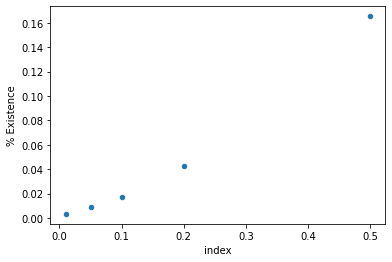

In [23]:
authorPathLenDiffSampleSize.reset_index().plot(x='index', y='% Existence', kind='scatter')
plt.show()

It is likely that there's a line that fits the points.

Or curve like log regression, that's capped at certain value regardless sample size.

Personally, I think the second makes more sense. (as supported by full dataset analysis)

#### Running on larger dataset

Modified a few codes to help the algorithm better fits large dataset

- use frac = 0.5 on main_dataset
- used cutoff = 10 to speed up process (had already tried, using cutoff or not on previous set makes few difference), although may lose some accuracy, but (1) path with too large path length are not what we concern about (2) it significantly saves time

In [24]:
authorPathLenDiffSampleSize.head()

,Number of Authors,Nonzero,% Existence,average,median,max
0.01,7818,201788,0.003301,1.146255,1.000000,6
0.05,35476,10846110,0.008618,1.455772,2.222222,10
0.10,66687,76875665,0.017286,1.735625,1.928571,10
0.20,123382,644163416,0.042315,2.393930,1.000000,10
0.50,268755,11943196827,0.165351,3.577936,1.000000,10


In [19]:
#authorPathLenDiffSampleSize.reset_index()
#authorPathLenDiffSampleSize.to_csv("2.csv")
authorPathLenDiffSampleSize = pd.read_csv('2.csv',index_col=0)
# load previous exported data

In [48]:
for size in [0.5]:
    comments_authors = comments.sample(frac = size, random_state=1121)[['id','link_id','author']]
    
    # join link_id with link_author
    out = comments_authors.merge(id_author, left_on='link_id', right_on='link_id')

    print("-- DONE MERGING")
    
    # create graph on it
    link_df = out.groupby('link_author')['author'].apply(list).reset_index()
    link_df = link_df.explode('author')
    print('-- DONE EXPLODING')
    
    G = nx.from_pandas_edgelist(link_df, 'author','link_author')
    print('-- DONE GRAPHING')
    # use dijkstra instead of floyd warshall b/c sparse edge space
    #author_pathlen_dict = dict(nx.all_pairs_dijkstra_path_length(G))
    #print('-- DONE PATHING')
    
    # collect information
    countPath = 0
    avgs = []
    max_len = 0
    
    authors_list = link_df.author.append(link_df.link_author).unique().tolist()
    print('-- START ANALYZING')
    for i in tqdm.tqdm(authors_list):
        author_pathlen_dict = nx.single_source_dijkstra_path_length(G,i,cutoff=10)
        countPath += len(author_pathlen_dict)
        if len(author_pathlen_dict)== 1:
            tmp = 0
        else:
            tmp = sum(author_pathlen_dict.values()) / (len(author_pathlen_dict)-1)
        avgs.append(tmp)
        max_len = max(max_len, max(author_pathlen_dict.values()))

    authorPathLenDiffSampleSize.at[size, 'Number of Authors'] = len(authors_list)
    authorPathLenDiffSampleSize.at[size,'Nonzero'] = countPath
    authorPathLenDiffSampleSize.at[size,'% Existence'] = countPath/len(authors_list)**2
    authorPathLenDiffSampleSize.at[size,'average'] = sum(avgs)/len(authors_list)
    authorPathLenDiffSampleSize.at[size,'median'] = avgs[len(avgs)//2]
    authorPathLenDiffSampleSize.at[size,'max'] = max_len

-- DONE MERGING
-- DONE EXPLODING
-- DONE GRAPHING
-- START ANALYZING


100%|████████████████████████████████| 268755/268755 [14:55:17<00:00,  5.00it/s]


In [20]:
authorPathLenDiffSampleSize

,Number of Authors,Nonzero,% Existence,average,median,max
0.01,7818,201788,0.003301,1.146255,1.000000,6
0.05,35476,10846110,0.008618,1.455772,2.222222,10
0.10,66687,76875665,0.017286,1.735625,1.928571,10
0.20,123382,644163416,0.042315,2.393930,1.000000,10
0.50,268755,11943196827,0.165351,3.577936,1.000000,10


#### Graphing on author avg path length

- once we finish processing on 50% of main_dataset
- plot a bar chart, every tile represents the avg path length, with one horizontal line representing avg of all length

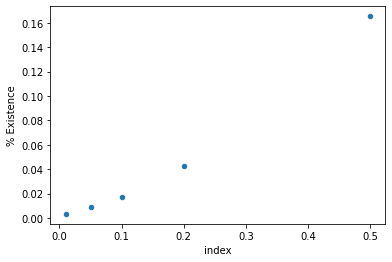

In [31]:
authorPathLenDiffSampleSize.reset_index().plot(x='index', y='% Existence', kind='scatter')
plt.show()

- active users (more than 2 connected user) vs all users (check against previous result)
- also compare running time

In [27]:
sampleSize = [0.01, 0.05, 0.1, 0.2]

authorPathLenDiffSampleSize_filterd = pd.DataFrame(index = sampleSize, 
                                           columns = ['Number of Authors',
                                                      'Nonzero',
                                                      '% Existence', 
                                                      'average', 
                                                      'median', 
                                                      'max'])

for size in sampleSize:
    print("==== size: " + str(size) + " ====")
    # sampling
    comments_authors = comments.sample(frac = size, random_state=1121)[['id','link_id','author']]
    
    # join link_id with link_author
    out = comments_authors.merge(id_author, left_on='link_id', right_on='link_id')

    print("-- DONE MERGING")
    
    # create graph on it
    link_df = out.groupby('link_author')['author'].apply(list).reset_index()
    link_df = link_df.explode('author')
    print('-- DONE EXPLODING')
    
    G = nx.from_pandas_edgelist(link_df, 'author','link_author')
    remove = [node for node,degree in dict(G.degree()).items() if degree <= 1]
    
    G_filtered = G.copy()
    G_filtered.remove_nodes_from(remove)
    print('-- DONE GRAPHING')
    # use dijkstra instead of floyd warshall b/c sparse edge space
    #author_pathlen_dict = dict(nx.all_pairs_dijkstra_path_length(G))
    #print('-- DONE PATHING')
    
    # collect information
    countPath = 0
    avgs = []
    max_len = 0
    
    authors_list = G_filtered.nodes()
    print('-- START ANALYZING')
    for i in tqdm.tqdm(authors_list):
        author_pathlen_dict = nx.single_source_dijkstra_path_length(G_filtered,i,cutoff=10)
        countPath += len(author_pathlen_dict)
        if len(author_pathlen_dict)== 1:
            tmp = 0
        else:
            tmp = sum(author_pathlen_dict.values()) / (len(author_pathlen_dict)-1)
        avgs.append(tmp)
        max_len = max(max_len, max(author_pathlen_dict.values()))

    authorPathLenDiffSampleSize_filterd.at[size, 'Number of Authors'] = len(authors_list)
    authorPathLenDiffSampleSize_filterd.at[size,'Nonzero'] = countPath
    authorPathLenDiffSampleSize_filterd.at[size,'% Existence'] = countPath/len(authors_list)**2
    authorPathLenDiffSampleSize_filterd.at[size,'average'] = sum(avgs)/len(authors_list)
    authorPathLenDiffSampleSize_filterd.at[size,'median'] = avgs[len(avgs)//2]
    authorPathLenDiffSampleSize_filterd.at[size,'max'] = max_len

==== size: 0.01 ====
-- DONE MERGING
-- DONE EXPLODING
-- DONE GRAPHING
-- START ANALYZING


100%|█████████████████████████████████████| 414/414 [00:00<00:00, 174973.99it/s]

==== size: 0.05 ====


-- DONE MERGING
-- DONE EXPLODING
-- DONE GRAPHING
-- START ANALYZING


100%|████████████████████████████████████| 2999/2999 [00:00<00:00, 57587.74it/s]

==== size: 0.1 ====


-- DONE MERGING
-- DONE EXPLODING
-- DONE GRAPHING
-- START ANALYZING


100%|█████████████████████████████████████| 7035/7035 [00:00<00:00, 7888.39it/s]


==== size: 0.2 ====
-- DONE MERGING
-- DONE EXPLODING
-- DONE GRAPHING
-- START ANALYZING


100%|████████████████████████████████████| 16055/16055 [00:27<00:00, 585.47it/s]


In [29]:

authorPathLenDiffSampleSize_filterd.to_csv('main/filtered_sampleSize_result.csv')
display(authorPathLenDiffSampleSize_filterd)
display(authorPathLenDiffSampleSize)

,Number of Authors,Nonzero,% Existence,average,median,max
0.01,414,528,0.003081,0.125604,0,4
0.05,2999,23835,0.00265,0.368137,0,10
0.10,7035,587307,0.011867,0.853351,0,10
0.20,16055,10888105,0.042241,1.746778,0,10


,Number of Authors,Nonzero,% Existence,average,median,max
0.01,7818,201788,0.003301,1.146255,1.000000,6
0.05,35476,10846110,0.008618,1.455772,2.222222,10
0.10,66687,76875665,0.017286,1.735625,1.928571,10
0.20,123382,644163416,0.042315,2.393930,1.000000,10
0.50,268755,11943196827,0.165351,3.577936,1.000000,10


We see that filtered data follows same pattern but different values as unfiltered data for main dataset

#### Use Snap to speed up process

In [30]:
import snap
result =pd.DataFrame(columns = ['Number of Authors',
                                'Nonzero',
                                '% Existence', 
                                'average', 
                                'median'])

sampleSize = [0.01, 0.05, 0.1]

for size in sampleSize:
    tmp = comments.sample(frac=size,random_state = 1121)
    
    tmp = tmp.merge(id_author, left_on='link_id', right_on='link_id')
    
    # encode into int to pass in snap graph
    author_list = tmp.author.append(tmp.link_author).unique().tolist()
    encode_int = pd.DataFrame({'author': author_list, 'author_id':range(len(author_list))})
    tmp = tmp.merge(encode_int, on = 'author')
    encode_int.columns = ['link_author','link_author_id']
    tmp = tmp.merge(encode_int, on = 'link_author')
    
    # construct graph in snap
    G1 = snap.TUNGraph.New()
    # Add nodes:
    nodes = tmp.author_id.append(tmp.link_author_id).unique().tolist()
    for node in tqdm.tqdm(nodes):
        G1.AddNode(int(node))
    # Add edges:
    for index, row in tmp.iterrows():
        G1.AddEdge(int(row['link_author_id']), int(row['author_id']))
    
    countPath = 0
    avgs = []
    max_len = 0

    index = str(size)

    print('-- START ANALYZING')

    for i in tqdm.tqdm(nodes):
        shortestPath, NIdToDistH = G1.GetShortPathAll(i, MaxDist = 10)
        countPath += len(NIdToDistH)
        if len(NIdToDistH)== 1:
            tmp = 0
        else:
            sum_length = 0
            for item in NIdToDistH:
                sum_length += NIdToDistH[item]
            tmp =  sum_length / (len(NIdToDistH)-1)
        avgs.append(tmp)

    result.at[index, 'Number of Authors'] = len(nodes)
    result.at[index,'Nonzero'] = countPath
    result.at[index,'% Existence'] = countPath/len(nodes)**2
    result.at[index,'average'] = sum(avgs)/len(nodes)
    result.at[index,'median'] = avgs[len(avgs)//2]

100%|███████████████████████████████████| 7818/7818 [00:00<00:00, 585607.08it/s]


-- START ANALYZING


100%|█████████████████████████████████| 35476/35476 [00:00<00:00, 852935.34it/s]


-- START ANALYZING


100%|█████████████████████████████████| 66687/66687 [00:00<00:00, 924319.50it/s]


-- START ANALYZING


100%|████████████████████████████████████| 66687/66687 [01:56<00:00, 574.45it/s]


In [31]:
display(result)
display(authorPathLenDiffSampleSize)


,Number of Authors,Nonzero,% Existence,average,median
0.01,7818,201788,0.003301,1.146255,1.0
0.05,35476,10846110,0.008618,1.455772,1.0
0.1,66687,76875665,0.017286,1.735625,1.5


,Number of Authors,Nonzero,% Existence,average,median,max
0.01,7818,201788,0.003301,1.146255,1.000000,6
0.05,35476,10846110,0.008618,1.455772,2.222222,10
0.10,66687,76875665,0.017286,1.735625,1.928571,10
0.20,123382,644163416,0.042315,2.393930,1.000000,10
0.50,268755,11943196827,0.165351,3.577936,1.000000,10


In [32]:
result.to_csv('main/snap_result.csv')

We see that using snap is way faster than nx, and gives almost same result. We will be using snap for the rest of the project (except if we need to draw graphs, we may consider using networkx)

Also, we see that the using filtered data (filter inactive users) increases our performance, although the data are different, they follow same pattern. Hence we will also use filtered graph for the following part

In [34]:
comments = comments.merge(id_author, left_on = 'link_id', right_on = 'link_id')

In [41]:
import snap
result =pd.DataFrame(columns = ['Number of Authors',
                                'Nonzero',
                                '% Existence', 
                                'average'])

sampleSize = [i/100 for i in range (1,31,2)]
sampleSize.append(0.35)
sampleSize.append(0.4)
sampleSize.append(0.5)

for size in tqdm.tqdm(sampleSize):
    tmp = comments.sample(frac=size,random_state = 1121)
    
    # encode into int to pass in snap graph
    author_list = tmp.author.append(tmp.link_author).unique().tolist()
    encode_int = pd.DataFrame({'author': author_list, 'author_id':range(len(author_list))})
    tmp = tmp.merge(encode_int, on = 'author')
    encode_int.columns = ['link_author','link_author_id']
    tmp = tmp.merge(encode_int, on = 'link_author')
    
    # construct graph in snap
    G1 = snap.TUNGraph.New()
    # Add nodes:
    nodes = tmp.author_id.append(tmp.link_author_id).unique().tolist()
    for node in nodes:
        G1.AddNode(int(node))
    # Add edges:
    for index, row in tmp.iterrows():
        G1.AddEdge(int(row['link_author_id']), int(row['author_id']))
    
    G1.DelDegKNodes(1,1)
    G1.DelDegKNodes(0,0)
    
    nodes = []
    for NI in G1.Nodes():
        nodes.append(NI.GetId())

    countPath = 0
    avgs = 0
    max_len = 0

    index = str(size)

    for i in nodes:
        shortestPath, NIdToDistH = G1.GetShortPathAll(i, MaxDist = 10)
        countPath += len(NIdToDistH)
        if len(NIdToDistH)== 1:
            tmp = 0
        else:
            sum_length = 0
            for item in NIdToDistH:
                sum_length += NIdToDistH[item]
            tmp =  sum_length / (len(NIdToDistH)-1)
        avgs = avgs + tmp

    result.at[index, 'Number of Authors'] = len(nodes)
    result.at[index,'Nonzero'] = countPath
    result.at[index,'% Existence'] = countPath/len(nodes)**2
    result.at[index,'average'] = avgs/len(nodes)


100%|███████████████████████████████████████████| 15/15 [05:32<00:00, 22.16s/it]


In [50]:
display(result)
result.to_csv('main/filtered_pathlen.csv')

,Number of Authors,Nonzero,% Existence,average
0.01,24,92,0.159722,1.083333
0.03,239,2885,0.050507,1.45328
0.05,601,20431,0.056564,1.904356
0.07,1112,85874,0.069447,2.236202
0.09,1779,253429,0.080076,2.306669
0.11,2568,672106,0.101917,2.674572
0.13,3498,1572446,0.12851,2.947919
0.15,4429,3065701,0.156285,3.206518
0.17,5562,5206908,0.168313,3.35747
0.19,6725,8342551,0.184465,3.546538


# Plottings / Insights

In [51]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
main_result = pd.read_csv('main/filtered_pathlen.csv', index_col=0)

In [54]:
full_result = pd.read_csv('full/result.csv', index_col=0)

In [60]:
importance_of_active = pd.read_csv('full/importance_of_active.csv',index_col =0)

In [61]:
full_per = pd.read_csv('full/PS5_author_avg.csv',index_col=0)
full_filtered_per = pd.read_csv('full/PS5_filtered_author_avg.csv',index_col=0)

In [59]:
G = nx.from_pandas_edgelist(comments, 'author','link_author')

In [ ]:
# TODO:

# box charts: <DONE>
#    - full avg per (box) (count) (q3) [X] <== box_1.png

# bar charts: <DONE>
#    - importance_of_active (compare %, compare avg) (q4) [X] <== bar_1.png
#    - full_result[filtered vs remove top 1%] avg (q4) [X] <== bar_2.png

# scattered: <DONE>
#    - main_result (x = perc, y = existence) (q1) <== scatter_2.png
#    - main_result (x = perc, y = #of author) (before q1, data insight) <== scatter_3.png
#    - main_result (x = perc, y = avg) (q2) <== scatter_2.png
#    - main_result (x = # of author, y = existence) (q1) <== scatter_1.png
#    - main_result (x = # of author, y = avg) (q1) <== scatter_1.png


# pie chart: <DONE>
#    - full_result [filtered, remove top 1%] (% of existence) q4 <== pie_2.png
#    - full_result [full, filtered] (% of existence) verify filtering <== pie_3.png
#    - main_result [full, filtered (50%)] (% of existence) verify filtering <== pie_1.png

In [72]:
full_result.columns=['Number of Authors', 'Number of Path', '% Existence', 'Average']

## Box plotting

Average path length of all authors under PS5: 


count    148422.000000
mean          3.002370
std           0.350948
min           0.000000
25%           2.727219
50%           2.957802
75%           3.240021
max           5.341353
Name: average path length of each author to other authors, dtype: float64

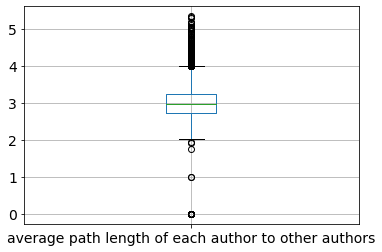

In [89]:
full_filtered_per.columns = ['author', 'average path length of each author to other authors']
tmp = full_filtered_per.boxplot(column='average path length of each author to other authors', fontsize=14)
print("Average path length of all authors under PS5: ")
display(full_filtered_per['average path length of each author to other authors'].describe())

## Bar charts

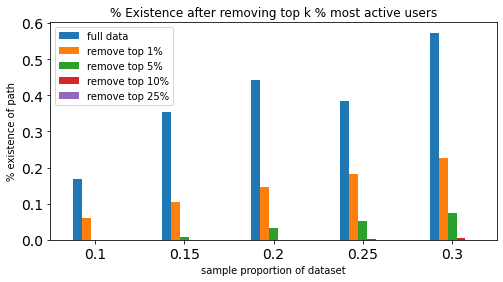

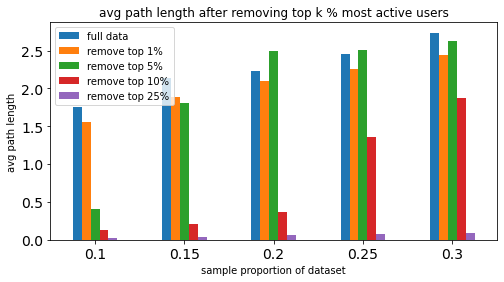

In [153]:
tmp = importance_of_active[['random %','remove 1 %', 'remove 5 %', 'remove 10 %', 'remove 25 %']]
tmp.columns = ['full data', 'remove top 1%', 'remove top 5%','remove top 10%','remove top 25%']

tmp.plot.bar(xlabel = 'sample proportion of dataset',
             ylabel = '% existence of path',
             figsize = (8,4),
             fontsize = 14,
             title = '% Existence after removing top k % most active users',
             rot = 0)
plt.show()

tmp = importance_of_active[['random avg','remove 1 avg', 'remove 5 avg', 'remove 10 avg', 'remove 25 avg']]
tmp.columns = ['full data', 'remove top 1%', 'remove top 5%','remove top 10%','remove top 25%']
tmp.plot.bar(xlabel = 'sample proportion of dataset',
             ylabel = 'avg path length',
             figsize = (8,4),
             fontsize = 14,
             title = 'avg path length after removing top k % most active users',
             rot = 0)
plt.show()

,Number of Authors,Number of Path,% Existence,Average
Original,148422,22017811496,0.999488,3.002370
remove top 1%,146938,11882782146,0.550364,3.220571


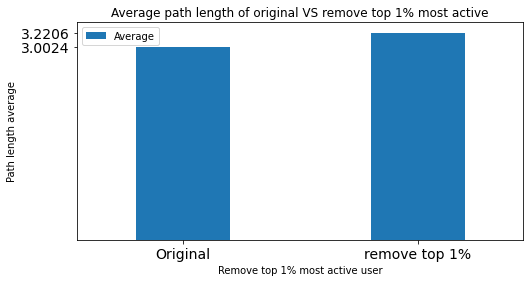

In [152]:
tmp = full_result.loc['PS5 - filtered':]
tmp = tmp.rename(index = {'PS5 - filtered': 'Original', 'PS5 - remove top 1%': 'remove top 1%'})
display(tmp)
ax = tmp.plot.bar(xlabel = 'Remove top 1% most active user',
                  ylabel = 'Path length average',
                  y = 'Average',
                  figsize = (8,4),
                  fontsize = 14,
                  title = 'Average path length of original VS remove top 1% most active',
                  width = 0.4,
                  rot = 0)
ax.set_yticks(tmp['Average'])
plt.show()

## Scattered

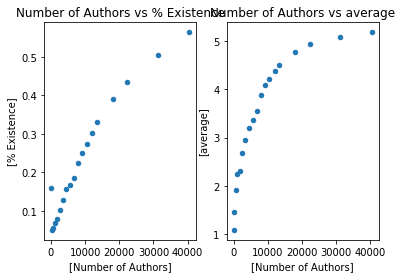

In [187]:
main_result['sample %'] = main_result.index

tmp = main_result[['% Existence', 'average', 'Number of Authors']]

fig, axes = plt.subplots(1,len(tmp.columns.values)-1)

for i, col in enumerate(tmp.columns.values[:-1]):
    tmp.plot(x=['Number of Authors'], y=[col], kind="scatter", ax=axes[i], title = 'Number of Authors vs ' + str(col))

plt.show()

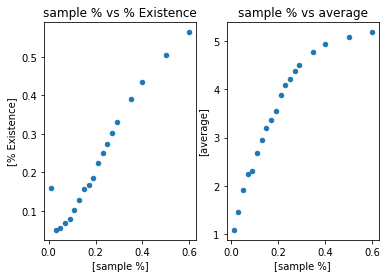

In [186]:
tmp = main_result[['% Existence', 'average', 'sample %']]

fig, axes = plt.subplots(1,len(tmp.columns.values)-1)

for i, col in enumerate(tmp.columns.values[:-1]):
    tmp.plot(x=['sample %'], y=[col], kind="scatter", ax=axes[i], title = 'sample % vs ' + str(col))

plt.show()

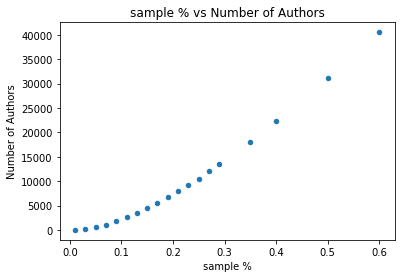

In [188]:
main_result.plot.scatter(x = 'sample %', y = 'Number of Authors', title='sample % vs Number of Authors')
plt.show()

## Pie charts

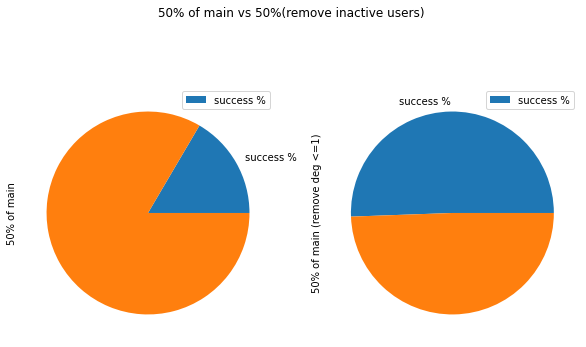

In [225]:
tmp = pd.DataFrame()
tmp.at['success %', '50% of main'] = authorPathLenDiffSampleSize.loc[0.5]['% Existence']
tmp.at['', '50% of main'] = 1- authorPathLenDiffSampleSize.loc[0.5]['% Existence']

tmp.at['success %', '50% of main (remove deg <=1)'] = result.loc['0.5']['% Existence']
tmp.at['', '50% of main (remove deg <=1)'] = 1- result.loc['0.5']['% Existence']

tmp.plot.pie(subplots=True, figsize = (10,6), title = '50% of main vs 50%(remove inactive users)')
plt.show()

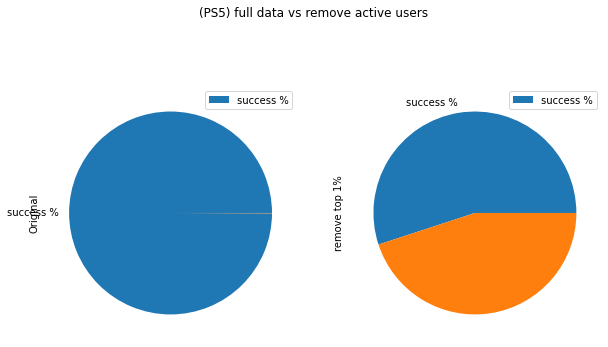

In [226]:
tmp = pd.DataFrame()
tmp.at['success %', 'Original'] = full_result.loc['PS5 - filtered']['% Existence']
tmp.at['', 'Original'] = 1- full_result.loc['PS5 - filtered']['% Existence']

tmp.at['success %', 'remove top 1%'] = full_result.loc['PS5 - remove top 1%']['% Existence']
tmp.at['', 'remove top 1%'] = 1- full_result.loc['PS5 - remove top 1%']['% Existence']

tmp.plot.pie(subplots=True, figsize = (10,6), title = '(PS5) full data vs remove active users')
plt.show()

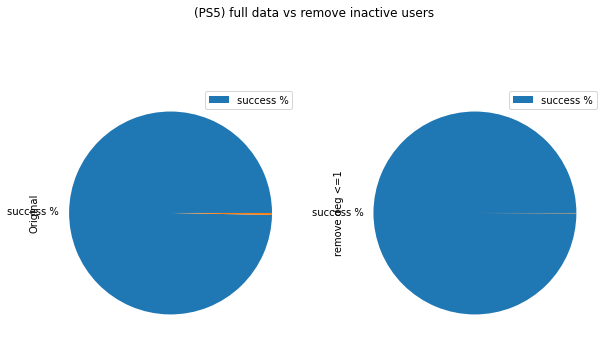

In [227]:
tmp = pd.DataFrame()
tmp.at['success %', 'Original'] = full_result.loc['PS5 - full']['% Existence']
tmp.at['', 'Original'] = 1- full_result.loc['PS5 - full']['% Existence']

tmp.at['success %', 'remove deg <=1'] = full_result.loc['PS5 - filtered']['% Existence']
tmp.at['', 'remove deg <=1'] = 1- full_result.loc['PS5 - filtered']['% Existence']

tmp.plot.pie(subplots=True, figsize = (10,6), title = '(PS5) full data vs remove inactive users')
plt.show()